<h1>Data Wrangling - Laptop Pricing Dataset</h1>

In [1]:
#import libraries
import numpy as np                #to handle missing values
import pandas as pd               # to read and clean data
import matplotlib.pyplot as plt   # to plot the data
%matplotlib inline

In [2]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

In [3]:
#Read file
df = pd.read_csv(file_path)

In [4]:
#Overview info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [5]:
df.head(5)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [6]:
#rounding decimal vlaues
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df['Screen_Size_cm'].head(5)

0    35.56
1    39.62
2    39.62
3    33.78
4    39.62
Name: Screen_Size_cm, dtype: float64

In [7]:
#check for missing values
df.isnull().sum()

Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

In [8]:
#calculate mean Weight
Average_Weight = df[['Weight_kg']].astype('float64').mean()
Average_Weight

Weight_kg    1.862232
dtype: float64

In [9]:
#replace the null values with mean weight
Replace_Data = df[['Weight_kg']].replace(np.nan,Average_Weight)
df.fillna(Replace_Data, inplace = True)
df.reset_index().head(5)

,index,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [10]:
df.isnull().sum()

Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

In [11]:
#finding the common_screen_size
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
common_screen_size

39.62

In [12]:
#replace the null values with common_screen_size
df[['Screen_Size_cm']] = df[['Screen_Size_cm']].replace(np.nan,common_screen_size )
df.head(5)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [13]:
#convert cm to inches for 'Screen_Size'
df['Screen_Size_cm'] = df['Screen_Size_cm']*2.54
df.rename(columns = {'Screen_Size_cm':'Screen_Size_inch'},inplace = True)

In [14]:
#convert kg to pounds for 'Weight'
df['Weight_kg'] = df['Weight_kg']*2.205
df.rename(columns = {'Weight_kg':'Weight_pound'},inplace = True)

In [15]:
df.head(5)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pound,Price
0,0,Acer,4,IPS Panel,2,1,5,90.3224,1.6,8,256,3.52800,978
1,1,Dell,3,Full HD,1,1,3,100.6348,2.0,4,256,4.85100,634
2,2,Dell,3,Full HD,1,1,7,100.6348,2.7,8,256,4.85100,946
3,3,Dell,4,IPS Panel,2,1,5,85.8012,1.6,8,128,2.69010,1244
4,4,HP,4,Full HD,2,1,7,100.6348,1.8,8,256,4.21155,837


In [16]:
#Normalizing the CPU_frequency to handle outliers
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()
df.head(5)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pound,Price
0,0,Acer,4,IPS Panel,2,1,5,90.3224,0.551724,8,256,3.52800,978
1,1,Dell,3,Full HD,1,1,3,100.6348,0.689655,4,256,4.85100,634
2,2,Dell,3,Full HD,1,1,7,100.6348,0.931034,8,256,4.85100,946
3,3,Dell,4,IPS Panel,2,1,5,85.8012,0.551724,8,128,2.69010,1244
4,4,HP,4,Full HD,2,1,7,100.6348,0.620690,8,256,4.21155,837


In [17]:
#create bins to categorize the data
bins = np.linspace(min(df['Price']),max(df['Price']),4)
print("bins=",bins)

bins= [ 527.         1621.33333333 2715.66666667 3810.        ]


In [18]:
#create group
Group = ['Low', 'Medium', 'High']

In [19]:
#binning the data
df['Price_binnned'] = pd.cut(df['Price'], bins, labels = Group, include_lowest = True)

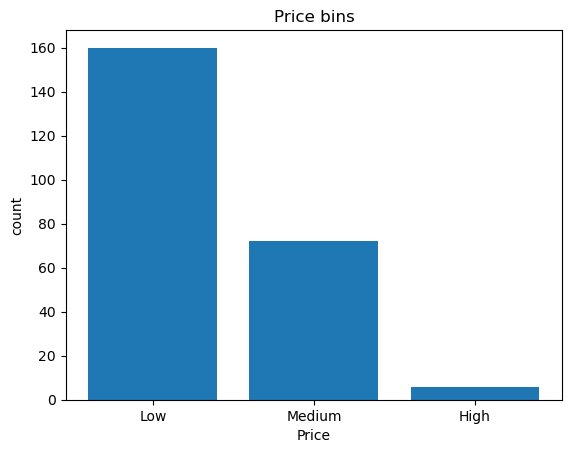

In [20]:
#plot to visulaize the binned data
plt.bar(Group, df["Price_binnned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")
plt.show()

In [21]:
#create dummy_variables
dummy_variables1 = pd.get_dummies(df['Screen'])
dummy_variables1.head(5)

,Full HD,IPS Panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False


In [22]:
#rename columns
dummy_variables1.rename(columns = {'Full HD':'Screen_Full_HD', 'IPS Panel': 'Screen_IPS Panel'})
pd.concat([df,dummy_variables1], axis = 1)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pound,Price,Price_binnned,Full HD,IPS Panel
0,0,Acer,4,IPS Panel,2,1,5,90.3224,0.551724,8,256,3.52800,978,Low,False,True
1,1,Dell,3,Full HD,1,1,3,100.6348,0.689655,4,256,4.85100,634,Low,True,False
2,2,Dell,3,Full HD,1,1,7,100.6348,0.931034,8,256,4.85100,946,Low,True,False
3,3,Dell,4,IPS Panel,2,1,5,85.8012,0.551724,8,128,2.69010,1244,Low,False,True
4,4,HP,4,Full HD,2,1,7,100.6348,0.620690,8,256,4.21155,837,Low,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,Lenovo,4,IPS Panel,2,1,7,90.3224,0.896552,8,256,3.74850,1891,Medium,False,True
234,234,Toshiba,3,Full HD,2,1,5,85.8012,0.827586,8,256,2.64600,1950,Medium,True,False
235,235,Lenovo,4,IPS Panel,2,1,5,77.4192,0.896552,8,256,2.99880,2236,Medium,False,True
236,236,Lenovo,3,Full HD,3,1,5,100.6348,0.862069,6,256,5.29200,883,Low,True,False


In [23]:
#Drop the Screen column
df.drop("Screen", axis = 1, inplace=True)

In [24]:
df.head(10)

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pound,Price,Price_binnned
0,0,Acer,4,2,1,5,90.3224,0.551724,8,256,3.52800,978,Low
1,1,Dell,3,1,1,3,100.6348,0.689655,4,256,4.85100,634,Low
2,2,Dell,3,1,1,7,100.6348,0.931034,8,256,4.85100,946,Low
3,3,Dell,4,2,1,5,85.8012,0.551724,8,128,2.69010,1244,Low
4,4,HP,4,2,1,7,100.6348,0.620690,8,256,4.21155,837,Low
5,5,Dell,3,1,1,5,100.6348,0.551724,8,256,4.85100,1016,Low
6,6,HP,3,3,1,5,100.6348,0.551724,8,256,4.63050,1117,Low
7,7,Acer,3,2,1,5,96.7740,0.551724,4,256,4.85100,866,Low
8,8,Dell,3,1,1,5,100.6348,0.862069,4,256,5.07150,812,Low
9,9,Acer,3,3,1,7,96.7740,0.620690,8,256,4.85100,1068,Low


In [25]:
#rounding the decimal values
df['Screen_Size_inch'] = np.round(df['Screen_Size_inch'],2)
df['CPU_frequency'] = np.round(df['CPU_frequency'],2)
df['Weight_pound'] = np.round(df['Weight_pound'],2)

In [26]:
#final Cleaned data
df.head(10)

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pound,Price,Price_binnned
0,0,Acer,4,2,1,5,90.32,0.55,8,256,3.53,978,Low
1,1,Dell,3,1,1,3,100.63,0.69,4,256,4.85,634,Low
2,2,Dell,3,1,1,7,100.63,0.93,8,256,4.85,946,Low
3,3,Dell,4,2,1,5,85.80,0.55,8,128,2.69,1244,Low
4,4,HP,4,2,1,7,100.63,0.62,8,256,4.21,837,Low
5,5,Dell,3,1,1,5,100.63,0.55,8,256,4.85,1016,Low
6,6,HP,3,3,1,5,100.63,0.55,8,256,4.63,1117,Low
7,7,Acer,3,2,1,5,96.77,0.55,4,256,4.85,866,Low
8,8,Dell,3,1,1,5,100.63,0.86,4,256,5.07,812,Low
9,9,Acer,3,3,1,7,96.77,0.62,8,256,4.85,1068,Low


In [27]:
#save data to new 'csv'file/
df.to_csv('Cleaned_Laptop_Price_Data.csv')